In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.linalg import inv
#http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#http://mathworld.wolfram.com/LeastSquaresFitting.html

In [2]:
skin = open('spiral.points.txt','r')
rl = skin.readlines()
#print(rl)

w = []
count = [0,0]
for e in rl:
    if(e.find('\n') != -1):
        e = e[:-1]
    a = e.split('\t')
    a = [float(i) for i in a]
    w.append(a)

skin.close()

In [3]:
def minimized_rss(x,y):
    x_ps = inv(np.dot(x.T,x))
    x_psinv = np.dot(x_ps,x.T)
    w = np.dot(x_psinv,y)
    return w
def fill_poly(x_points,k=1):
    x= []
    for xp in x_points:
        each =[]
        for i in range(k+1):
            each.append(xp**i)
        x.append(each)
    x = np.array(x)
    return x

def y_hat(w,x):
    eq_ln = []
    for l in range(len(w)):
        eq_ln.append(w[l]*(x_points**l))
    eq_ln = np.sum(eq_ln,axis=0)
    return eq_ln

In [4]:
x_points = [e[0] for e in w]
y_points = [e[1] for e in w]
x_points = np.array(x_points)
y = np.array(y_points)
y.shape = (y.size,1)

In [12]:
mini = 65
k = 65 #Best K-th order model
x = fill_poly(x_points,k)

w = minimized_rss(x,y)
#print('Weights\n' , w)

y_h = y_hat(w,x_points)

error = 0.5 * np.sum((y_h - y_points )**2 )
print('Error: ', error)

Error:  8.14157626445


In [13]:
print(mini)

65


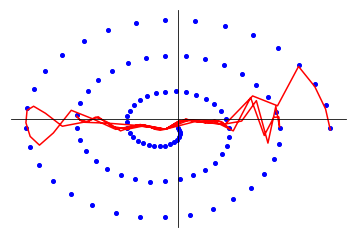

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.plot(x_points,y_points,'bo',ms = 4.01)
plt.plot(x_points,y_h,'r')
plt.show()